In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
url='https://raw.githubusercontent.com/araj2/customer-database/master/Ecommerce%20Customers.csv'
df=pd.read_csv(url)
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.shape

(500, 8)

In [5]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [8]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


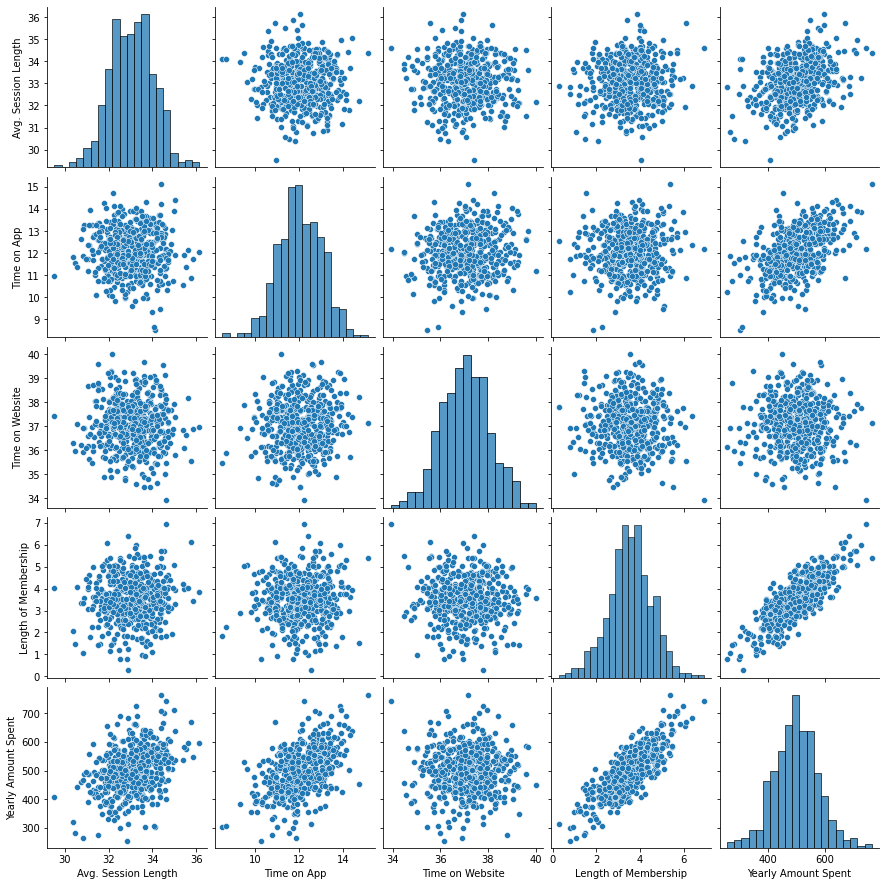

In [9]:
sns.pairplot(df)

In [10]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [11]:
df.head(2)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933


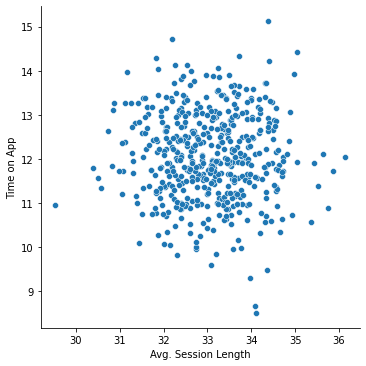

In [14]:
sns.relplot('Avg. Session Length', 'Time on App', data=df, sizes=(20,200))

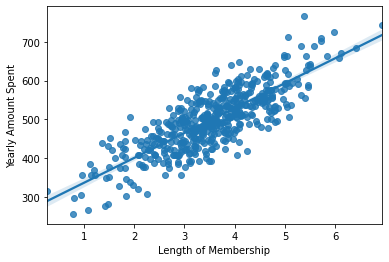

In [18]:
sns.regplot('Length of Membership','Yearly Amount Spent', data=df)

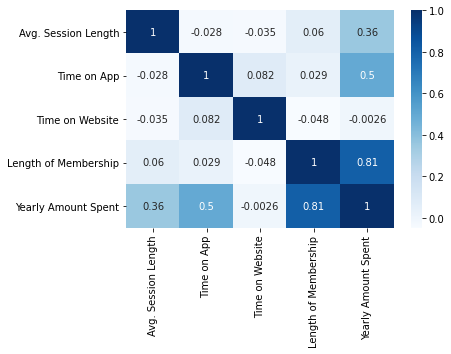

In [19]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)

# We can see there is strong relationship between length of Membership and yearly Amount spent 

# Splitting the dataset
Split the data into train and test sets. The feature we are intrested in predicting the **Yearly Amount Spent**

In [20]:
X=df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
Y=df['Yearly Amount Spent']

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test =train_test_split(X, Y, test_size=0.3, random_state=101)

# Train the model

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
regg=LinearRegression()

In [27]:
regg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
regg.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

# Predicting the model


In [30]:
pred=regg.predict(X_test)

Text(0, 0.5, 'Predicted Y')

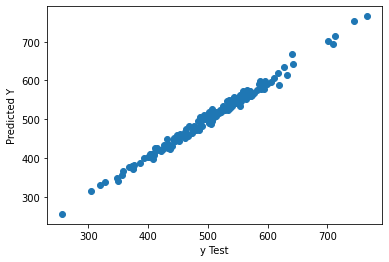

In [31]:
plt.scatter(y_test, pred)
plt.xlabel("y Test")
plt.ylabel("Predicted Y")

Model is pretty good 


# Evaluating The Model


Let's calcuate the errors

In [32]:
from sklearn import metrics


In [33]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 7.2281486534308295
Mean Squared Error: 79.8130516509743
Root Mean Squared Error: 8.933815066978626


# Conclusion

In [34]:
coeffecients=pd.DataFrame(regg.coef_,X.columns)
coeffecients.columns=['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


These numbers mean that holding all other features fixed, a 1 unit increase in Avg. Session Length will lead to an increase in $25.981550 in Yearly Amount Spent, and similarly for the other features